### Q1：不同城市骑单车的平均时间有什么差别？
### Q2：每月、每周、每天最活跃的时间分别是什么？

#### 思路：认识数据、查看数据整体分布，是否有缺失值/null值、数据清洗统一、数据探索

In [58]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
os.chdir('C:/Users/Witsan/WitsanFolder/Data/City_Bike_Share/')

### 无清除异常值

In [2]:
data_chicago = pd.read_csv('Chicago-Divvy-2016.csv')
data_chicago.info()
data_chicago.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72131 entries, 0 to 72130
Data columns (total 12 columns):
trip_id              72131 non-null int64
starttime            72131 non-null object
stoptime             72131 non-null object
bikeid               72131 non-null int64
tripduration         72131 non-null int64
from_station_id      72131 non-null int64
from_station_name    72131 non-null object
to_station_id        72131 non-null int64
to_station_name      72131 non-null object
usertype             72131 non-null object
gender               54977 non-null object
birthyear            54986 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.6+ MB


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0
1,9080521,3/31/2016 22:59,3/31/2016 23:02,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974.0
2,9080479,3/31/2016 22:24,3/31/2016 22:26,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992.0
3,9080475,3/31/2016 22:22,3/31/2016 22:41,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979.0
4,9080443,3/31/2016 22:08,3/31/2016 22:19,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997.0


In [37]:
data_ccg = pd.DataFrame()
split_time = data_chicago['starttime'].str.split('/')
day = split_time.str[1]
month = split_time.str[0].astype('int')
year = split_time.str[2].str.split(' ').str[0]
hour = split_time.str[2].str.split(' ').str[1].str.split(':').str[0].astype('int')
minute = split_time.str[2].str.split(' ').str[1].str.split(':').str[1]
date_time = data_chicago['starttime'].str.split(' ').str[0]

data_ccg['duration_min'] = data_chicago['tripduration']/60
data_ccg['day'] = day
data_ccg['month'] = month
data_ccg['year'] = year
data_ccg['hour'] = hour
data_ccg['minute'] = minute
data_ccg['date_time'] = pd.to_datetime(date_time)
data_ccg['usertype'] = data_chicago['usertype']
data_ccg['dayofweek'] = data_ccg['date_time'].dt.weekday_name
data_ccg['label'] = 'chicago'

data_ccg.head()

,duration_min,day,month,year,hour,minute,date_time,usertype,dayofweek,label
0,15.433333,31,3,2016,23,30,2016-03-31,Subscriber,Thursday,chicago
1,3.300000,31,3,2016,22,59,2016-03-31,Subscriber,Thursday,chicago
2,2.066667,31,3,2016,22,24,2016-03-31,Subscriber,Thursday,chicago
3,19.683333,31,3,2016,22,22,2016-03-31,Subscriber,Thursday,chicago
4,10.933333,31,3,2016,22,08,2016-03-31,Subscriber,Thursday,chicago


In [25]:
data_newyork = pd.read_csv('NYC-CitiBike-2016.csv')
data_newyork.info()
data_newyork.head()

In [38]:
data_nyc = pd.DataFrame()
split_time = data_newyork['starttime'].str.split('/')
day = split_time.str[1]
month = split_time.str[0].astype('int')
year = split_time.str[2].str.split(' ').str[0]
hour = split_time.str[2].str.split(' ').str[1].str.split(':').str[0].astype('int')
minute = split_time.str[2].str.split(' ').str[1].str.split(':').str[1]
date_time = data_newyork['starttime'].str.split(' ').str[0]

data_nyc['duration_min'] = data_newyork['tripduration']/60
data_nyc['day'] = day
data_nyc['month'] = month
data_nyc['year'] = year
data_nyc['hour'] = hour
data_nyc['minute'] = minute
data_nyc['date_time'] = pd.to_datetime(date_time)
data_nyc['usertype'] = data_newyork['usertype']
data_nyc['dayofweek'] = data_nyc['date_time'].dt.weekday_name
data_nyc['label'] = 'newyork'

data_nyc.head()

,duration_min,day,month,year,hour,minute,date_time,usertype,dayofweek,label
0,13.983333,1,1,2016,0,09,2016-01-01,Customer,Friday,newyork
1,11.433333,1,1,2016,0,21,2016-01-01,Subscriber,Friday,newyork
2,5.250000,1,1,2016,0,33,2016-01-01,Subscriber,Friday,newyork
3,12.316667,1,1,2016,0,40,2016-01-01,Subscriber,Friday,newyork
4,20.883333,1,1,2016,0,44,2016-01-01,Customer,Friday,newyork


In [24]:
data_washington = pd.read_csv('Washington-CapitalBikeshare-2016.csv')
data_washington.info()
data_washington.head()

In [39]:
data_wst = pd.DataFrame()
split_time = data_washington['Start date'].str.split('/')
day = split_time.str[1]
month = split_time.str[0].astype('int')
year = split_time.str[2].str.split(' ').str[0]
hour = split_time.str[2].str.split(' ').str[1].str.split(':').str[0].astype('int')
minute = split_time.str[2].str.split(' ').str[1].str.split(':').str[1]
date_time = data_washington['Start date'].str.split(' ').str[0]

# 1s = 1000ms,1min = 60s
data_wst['duration_min'] = data_washington['Duration (ms)']/60000
data_wst['day'] = day
data_wst['month'] = month
data_wst['year'] = year
data_wst['hour'] = hour
data_wst['minute'] = minute
data_wst['date_time'] = pd.to_datetime(date_time)
data_wst['usertype'] = data_washington['Member Type'].str.replace('Registered','Subscriber').str.replace('Casual','Customer')
data_wst['dayofweek'] = data_wst['date_time'].dt.weekday_name
data_wst['label'] = 'washington'

data_wst.head()

,duration_min,day,month,year,hour,minute,date_time,usertype,dayofweek,label
0,7.123117,31,3,2016,22,57,2016-03-31,Subscriber,Thursday,washington
1,9.792517,31,3,2016,22,46,2016-03-31,Subscriber,Thursday,washington
2,6.632983,31,3,2016,22,46,2016-03-31,Subscriber,Thursday,washington
3,7.404700,31,3,2016,22,42,2016-03-31,Subscriber,Thursday,washington
4,13.014583,31,3,2016,22,21,2016-03-31,Subscriber,Thursday,washington


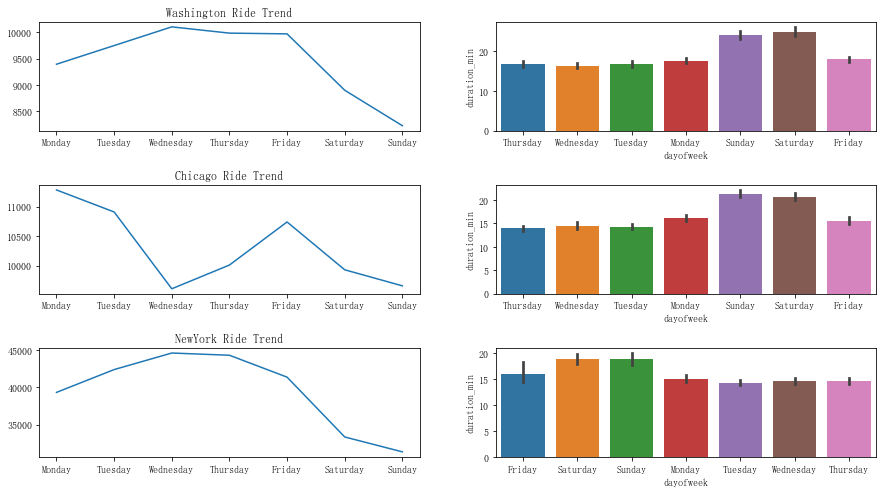

In [22]:
# this function use to sort the plot xlabel
def dayofweekplot(df,ax,title):
    sorter = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    sorterindex = dict(zip(sorter,range(len(sorter))))
    city_dayofweek = pd.DataFrame(df['dayofweek'].value_counts())
    city_dayofweek.columns = ['times']
    city_dayofweek['day_id'] = city_dayofweek.index
    city_dayofweek['day_id'] = city_dayofweek['day_id'].map(sorterindex)
    city_dayofweek.sort_values('day_id',inplace = True)
    ax.plot(city_dayofweek['day_id'],city_dayofweek['times'])
    ax.set_xticks([x for x in city_dayofweek.day_id])
    ax.set_xticklabels(city_dayofweek.index)
    plt.title(title)

fig = plt.figure(figsize = (15,8))
plt.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(3,2,1)
dayofweekplot(data_wst,ax1,'Washington Ride Trend')

ax1 = fig.add_subplot(3,2,2)
sns.barplot(data = data_wst,x = 'dayofweek',y='duration_min')

ax2 = fig.add_subplot(3,2,3)
dayofweekplot(data_ccg,ax2,'Chicago Ride Trend')

ax1 = fig.add_subplot(3,2,4)
sns.barplot(data = data_ccg,x = 'dayofweek',y='duration_min')

ax3 = fig.add_subplot(3,2,5)
dayofweekplot(data_nyc,ax3,'NewYork Ride Trend')

ax1 = fig.add_subplot(3,2,6)
sns.barplot(data = data_nyc,x = 'dayofweek',y='duration_min')

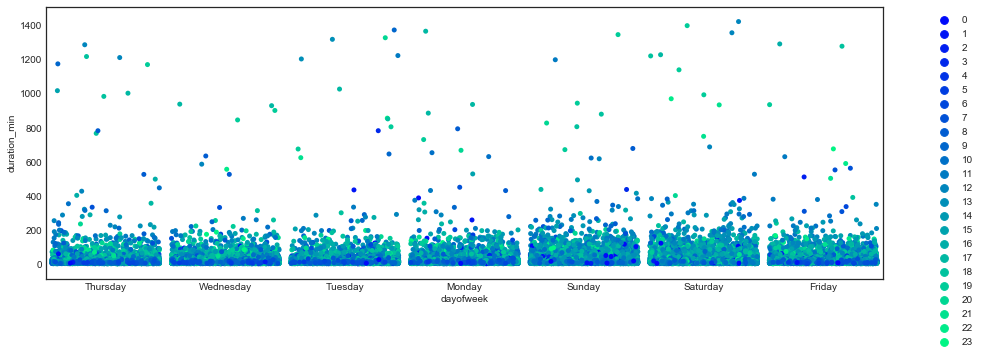

In [31]:
import seaborn as sns
sns.set_style('white')

data_wst['hour']=data_wst['hour'].astype('int')
# data_wst1 = data_wst[data_wst['duration_min']>200]
fig = plt.figure(figsize = (15,5))
sns.stripplot(x = 'dayofweek',y ='duration_min' ,hue = 'hour',data = data_wst, palette = 'winter',jitter = 0.45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

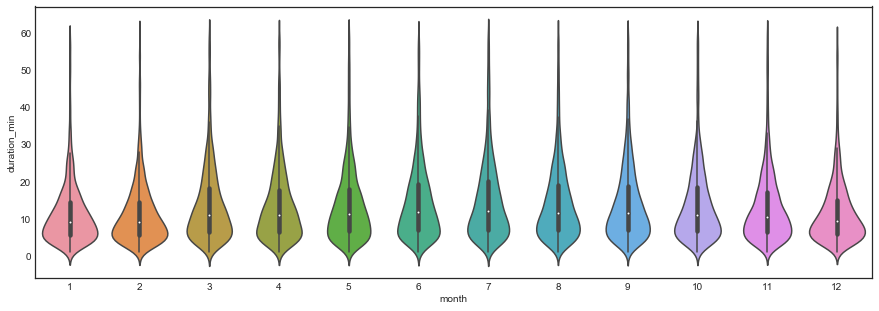

In [44]:
data_wst['month']=data_wst['month'].astype('int')
data_wst1 = data_wst[data_wst['duration_min']<60]
fig = plt.figure(figsize = (15,5))
sns.violinplot(x = 'month',y ='duration_min',data = data_wst1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

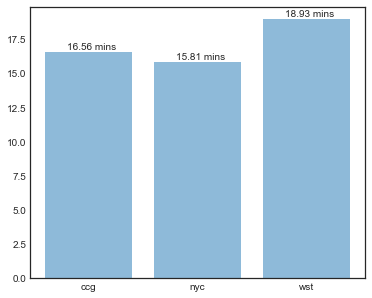

In [33]:
duration_wst = np.sum(data_wst['duration_min'])/ len(data_wst)
duration_nyc = np.sum(data_nyc['duration_min']) / len(data_nyc)
duration_ccg = np.sum(data_ccg['duration_min']) / len(data_ccg)
duration = pd.DataFrame({'city':['wst','ccg','nyc'],'duration_time':[duration_wst,duration_ccg,duration_nyc]}).sort_values(by=['city']).reset_index()

fig = plt.figure(num = 1,figsize = (6,5))
ax1 = fig.add_subplot(1,1,1)
plt.bar(duration['city'],duration['duration_time'],alpha = 0.5)
for i in range(len(duration)):  
    plt.text(i-0.2,duration['duration_time'][i]+0.2,'%0.2f mins'%(duration['duration_time'][i]))


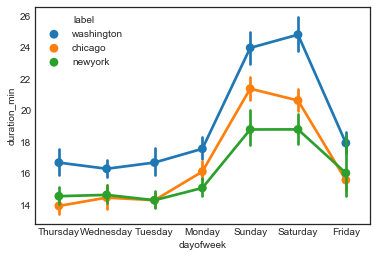

In [40]:
df_concat = pd.concat([data_wst,data_ccg,data_nyc])
sns.pointplot(data = df_concat,x = 'dayofweek',y='duration_min',hue = 'label' )

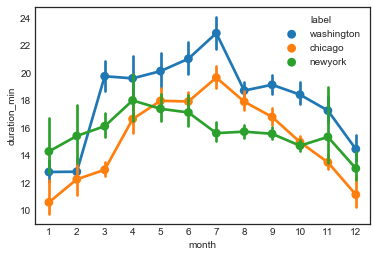

In [41]:
sns.pointplot(data = df_concat,x = 'month',y='duration_min',hue = 'label' )

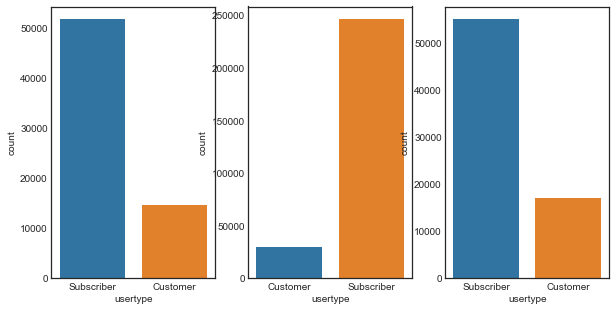

In [42]:
f,ax = plt.subplots(1,3,figsize = (10,5))
ax1 = ax[0]
sns.countplot(data = data_wst,x = 'usertype',ax = ax1 )
ax2 = ax[1]
sns.countplot(data = data_nyc,x = 'usertype',ax = ax2 )
ax3 = ax[2]
sns.countplot(data = data_ccg,x = 'usertype',ax = ax3 )

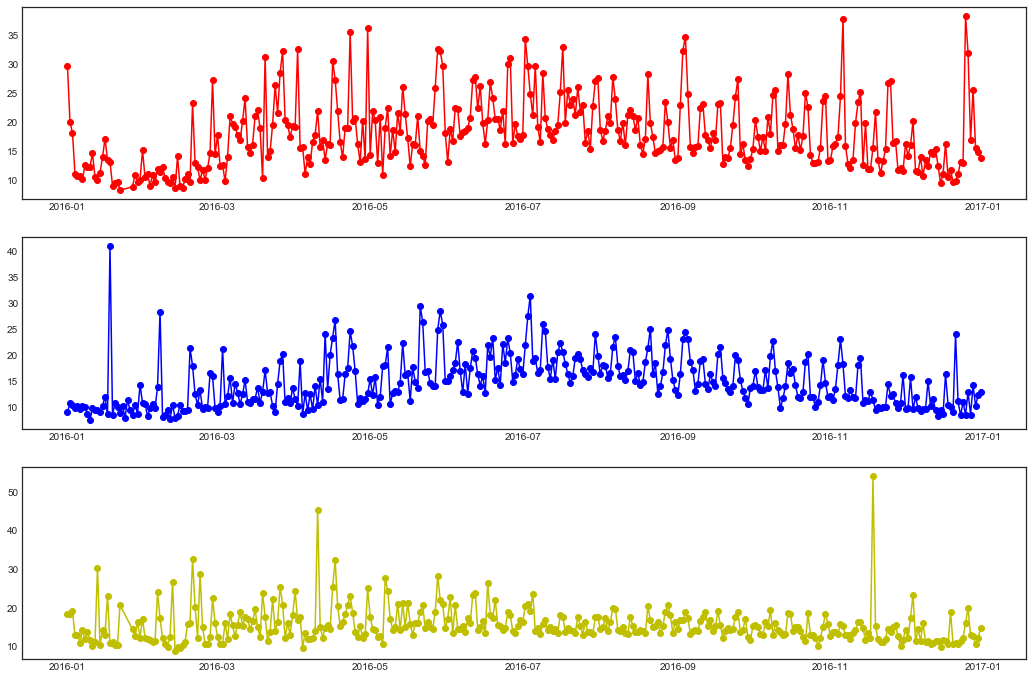

In [59]:
fig = plt.figure(figsize = (18,12))

ax1 = fig.add_subplot(3,1,1)
wst_avg_min = data_wst.groupby('date_time').mean()
plt.plot_date(wst_avg_min.index,wst_avg_min['duration_min'],linestyle="-",color = 'r',label = 'Washington')

ax2 = fig.add_subplot(3,1,2)
ccg_avg_min = data_ccg.groupby('date_time').mean()
plt.plot_date(ccg_avg_min.index,ccg_avg_min['duration_min'],linestyle="-",color = 'b',label = 'Chicago')

ax3 = fig.add_subplot(3,1,3)
nyc_avg_min = data_nyc.groupby('date_time').mean()
plt.plot_date(nyc_avg_min.index,nyc_avg_min['duration_min'],linestyle="-",color = 'y',label = 'NewYork')

### 清除异常值（数据清洗及探索）
#### 个别值非常突出，对观察大部分值的观察造成干扰，这里排除异常值采用3倍标准差/四分位